In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, tan, acos

In [18]:
image_path = "../Test_Images/"

base = "Base.JPG"
b1 = "Backwards1.JPG"
b2 = "Backwards2.jpg"
s1 = "Sideways1.JPG"
s2 = "Sideways2.JPG"

sample_path = image_path + base
sample_path

'../Test_Images/Base.JPG'

In [19]:
def sind(x):
    return sin(np.deg2rad(x))

def cosd(x):
    return cos(np.deg2rad(x))

def tand(x):
    return tan(np.deg2rad(x))

def acosd(x):
    return np.rad2deg(acos(x))

# CANONICAL ROTATION MATRICES
def R_yaw(alpha):
    return np.array([[1, 0, 0],
           [0, cosd(alpha), -sind(alpha)],
           [0, sind(alpha), cosd(alpha)]])

def R_pitch(beta):
    return np.array([[cosd(beta), 0, sind(beta)],
          [0, 1, 0],
          [-sind(beta), 0, cosd(beta)]])

# roll
def R_roll(gamma):
    return np.array([[cosd(gamma), -sind(gamma), 0],
           [sind(gamma), cosd(gamma), 0],
           [0, 0, 1]])

def get_tot_R(R_alpha, R_beta, R_gamma):
    return R_gamma*R_beta*R_alpha

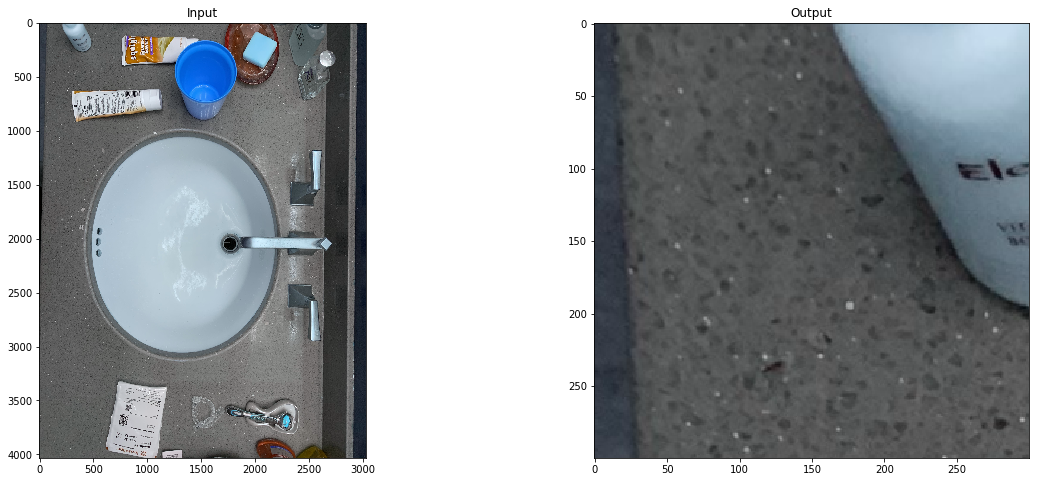

In [34]:
img = cv2.imread(image_path+base)
rows,cols,ch = img.shape

# Using the random points from the tutorial
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(img)
ax.set_title('Input')

ax2.imshow(dst)
ax2.set_title('Output')
plt.show()

In [35]:
M

array([[ 1.05587376e+00,  9.18151097e-02, -6.50969128e+01],
       [ 4.69010049e-02,  1.12562412e+00, -7.57920240e+01],
       [ 1.83251448e-04,  5.13337001e-04,  1.00000000e+00]])

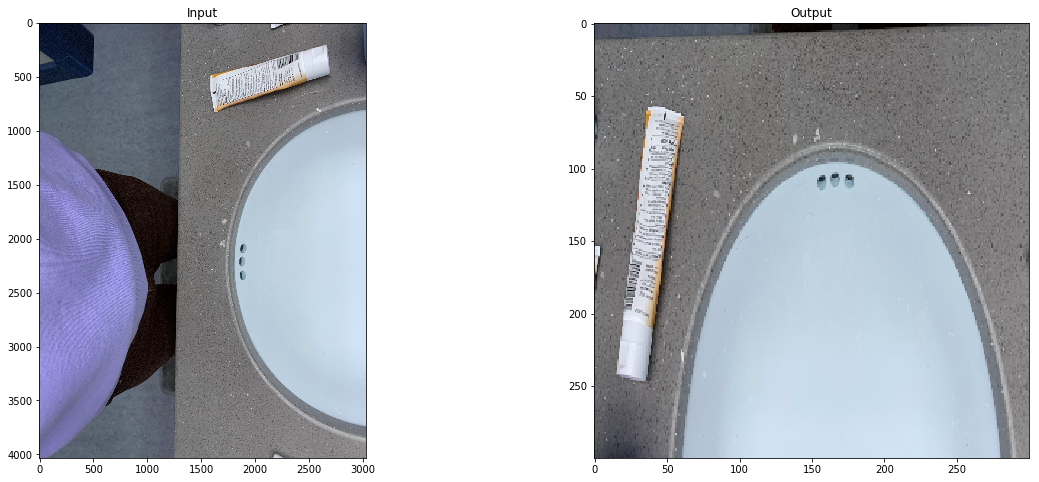

In [36]:
img = cv2.imread(image_path+b2)
rows,cols,ch = img.shape
pts1 = np.float32([[1250,0],[1250,4000],[3000,0],[3000,4000]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(300,300))

f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(img)
ax.set_title('Input')

ax2.imshow(dst)
ax2.set_title('Output')
plt.show()

In [37]:
M

array([[ 0.00000000e+00,  7.50000000e-02,  0.00000000e+00],
       [ 1.71428571e-01,  0.00000000e+00, -2.14285714e+02],
       [-0.00000000e+00, -0.00000000e+00,  1.00000000e+00]])

This time, update the above M values that are small to zero in order to see the effect

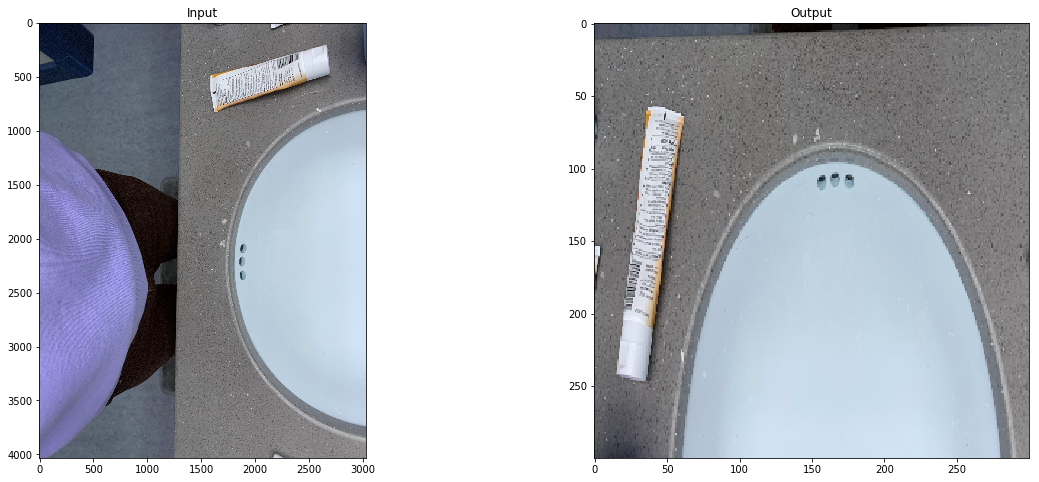

In [39]:
M_new = np.array([[ 0,  0.075,  0],
       [ 0.171428571,  0, -214.285714],
       [-0, -0,  1]])
dst = cv2.warpPerspective(img,M_new,(300,300))

f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(img)
ax.set_title('Input')

ax2.imshow(dst)
ax2.set_title('Output')
plt.show()

## Now, using rotation matrices instead of manually derived points

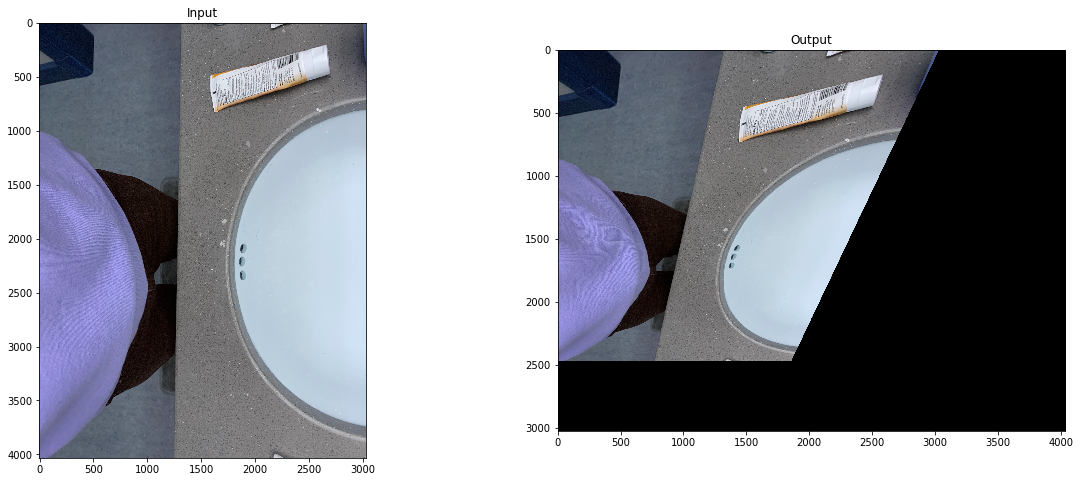

In [46]:
src = cv2.imread(image_path+b2)
rows,cols,ch = src.shape

M = R_yaw(0.009)
dst = cv2.warpPerspective(src, M, (rows,cols))

f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(src)
ax.set_title('Input')

ax2.imshow(dst)
ax2.set_title('Output')
plt.show()

## Attempt to rotate about 90 degrees, for RPY respectively

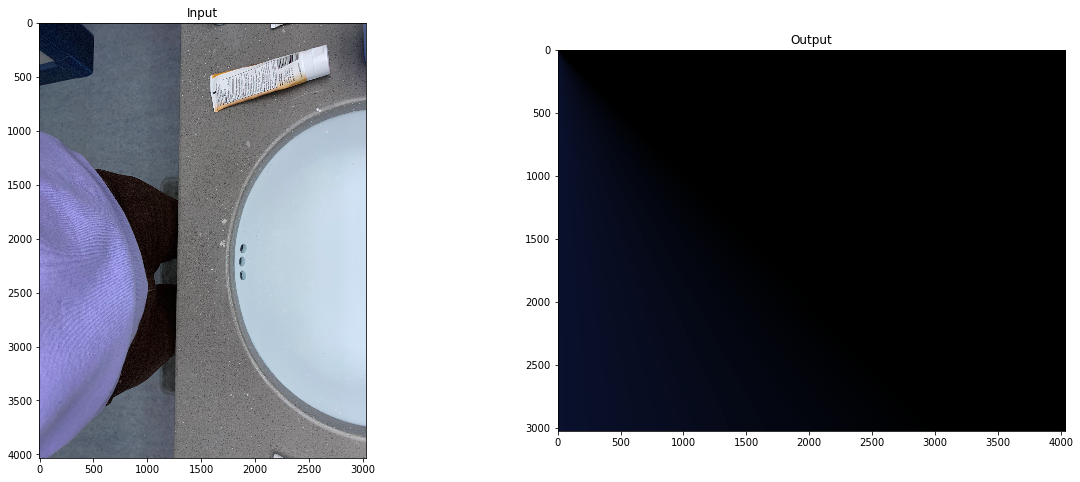

In [31]:
#cv2.warpPerspective(	src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]	) ->	dst
src = cv2.imread(image_path+b2)
rows,cols,ch = src.shape

M = R_yaw(90)
dst = cv2.warpPerspective(src, M, (rows,cols))

f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(src)
ax.set_title('Input')

ax2.imshow(dst)
ax2.set_title('Output')
plt.show()

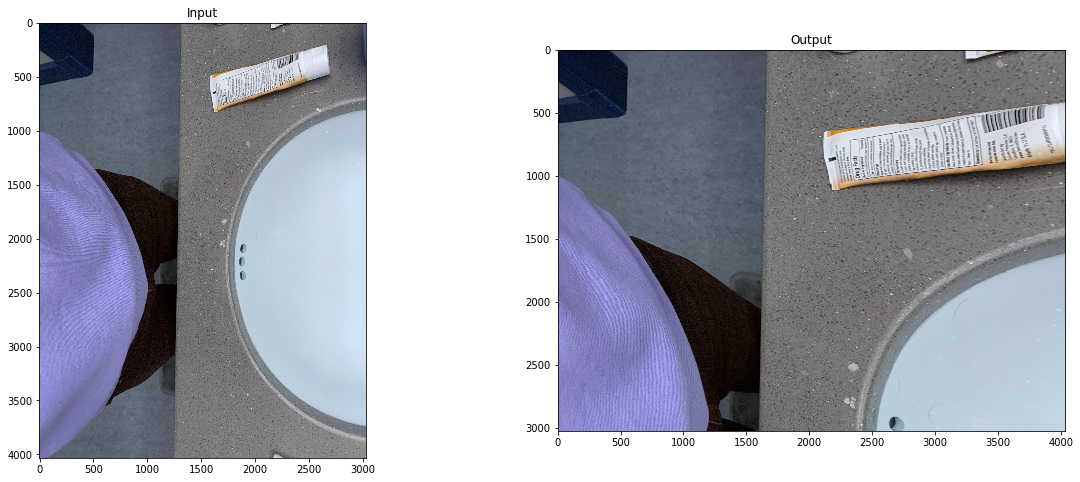

In [47]:
M = R_pitch(0.009)
dst = cv2.warpPerspective(src, M, (rows,cols))

f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(src)
ax.set_title('Input')

ax2.imshow(dst)
ax2.set_title('Output')
plt.show()

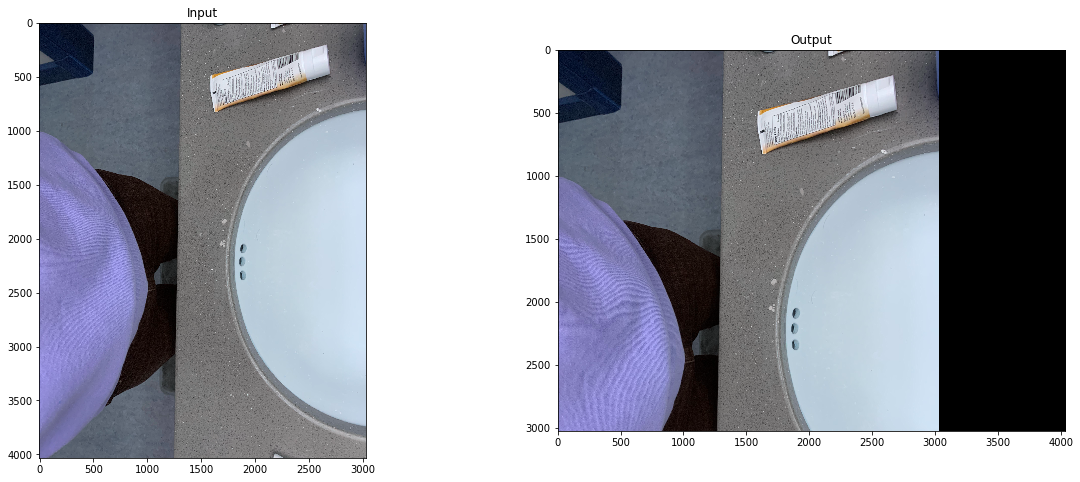

In [48]:
M = R_roll(0.009)
dst = cv2.warpPerspective(src, M, (rows,cols))

f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(src)
ax.set_title('Input')

ax2.imshow(dst)
ax2.set_title('Output')
plt.show()